In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

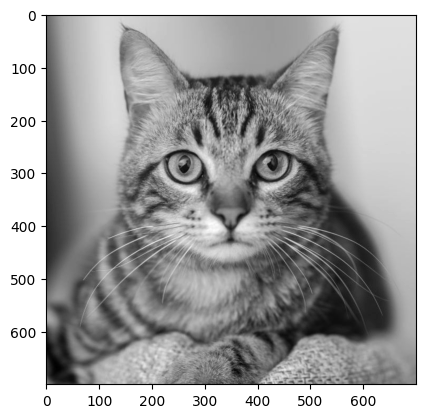

In [2]:
img = cv2.imread("images/org_img.jpg", flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')


In [3]:
# DEFINE PARAMETERS (Copied from Lowe's paper)
num_octaves = 4
s = 3 # number of intervals per octave
sigma_init = 1.6 # initial sigma
k = 2**(1/s) # sigma multiplier

# Initial blur of the image
img_blur = cv2.GaussianBlur(img, (0,0), sigma_init)

In [4]:
gaussian_pyramid = [[] for _ in range(num_octaves)]
gaussian_pyramid[0].append(img_blur)  # pre-blurred original image

for octave in range(num_octaves):
    print(f"Octave {octave}")
    if octave > 0:
        # Downsample image at index s from previous octave (sigma doubled)
        img_of_prev_octave = gaussian_pyramid[octave - 1][s]
        img_of_prev_octave_downsampled = cv2.resize(img_of_prev_octave, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
        gaussian_pyramid[octave].append(img_of_prev_octave_downsampled)
        img_blur = img_of_prev_octave_downsampled  # reset base image for this octave

    # Now generate s + 2 blurred images for this octave (total s+3 images)
    for i in range(1, s + 3):
        sigma_total = sigma_init * (k ** i)
        sigma_prev = sigma_init * (k ** (i - 1))
        sigma_diff = (sigma_total**2 - sigma_prev**2) ** 0.5  # incremental blur
        print(f"Sigma diff: {sigma_diff}")
        
        img_blur = cv2.GaussianBlur(img_blur, (0, 0), sigma_diff)
        gaussian_pyramid[octave].append(img_blur)


Octave 0
Sigma diff: 1.2262734984654078
Sigma diff: 1.5450077936447961
Sigma diff: 1.9465878414647129
Sigma diff: 2.4525469969308156
Sigma diff: 3.0900155872895922
Octave 1
Sigma diff: 1.2262734984654078
Sigma diff: 1.5450077936447961
Sigma diff: 1.9465878414647129
Sigma diff: 2.4525469969308156
Sigma diff: 3.0900155872895922
Octave 2
Sigma diff: 1.2262734984654078
Sigma diff: 1.5450077936447961
Sigma diff: 1.9465878414647129
Sigma diff: 2.4525469969308156
Sigma diff: 3.0900155872895922
Octave 3
Sigma diff: 1.2262734984654078
Sigma diff: 1.5450077936447961
Sigma diff: 1.9465878414647129
Sigma diff: 2.4525469969308156
Sigma diff: 3.0900155872895922


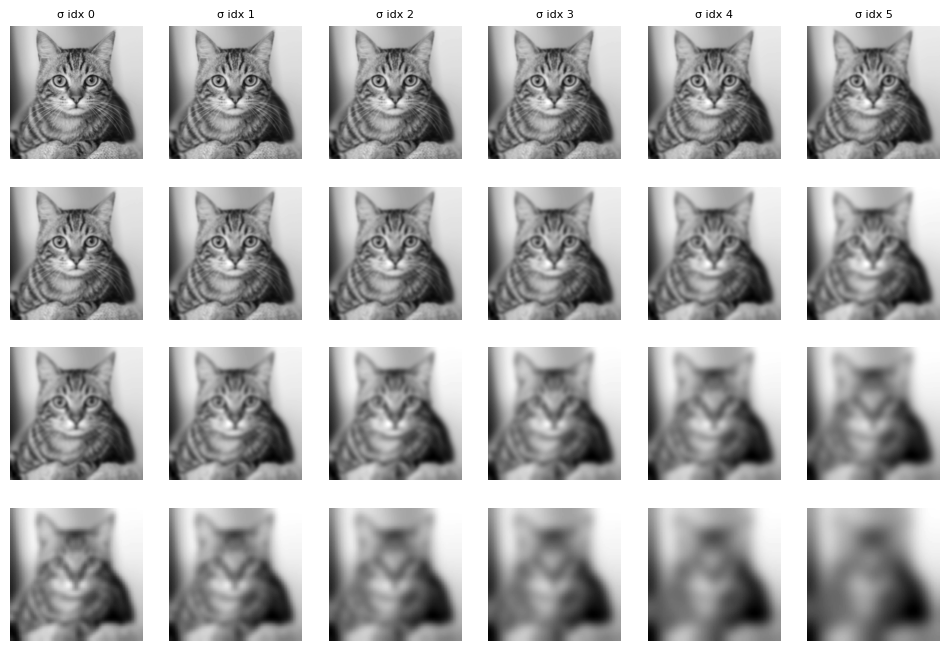

In [5]:
import matplotlib.pyplot as plt

num_octaves = len(gaussian_pyramid)
num_images_per_octave = len(gaussian_pyramid[0])  # s + 3 blurred images per octave

fig, axes = plt.subplots(num_octaves, num_images_per_octave, figsize=(2*num_images_per_octave, 2*num_octaves))

for octave_idx, octave_images in enumerate(gaussian_pyramid):
    for img_idx, img in enumerate(octave_images):
        ax = axes[octave_idx, img_idx]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if octave_idx == 0:
            ax.set_title(f'σ idx {img_idx}', fontsize=8)
    axes[octave_idx, 0].set_ylabel(f'Octave {octave_idx}', fontsize=10)

# plt.tight_layout()
plt.show()

